In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
cubs = pd.read_csv("C:/Users/pgper/Downloads/chicago_cubs_May16-18_2025.csv")
white_sox = pd.read_csv("C:/Users/pgper/Downloads/white_sox_May16-18_2025.csv")

In [23]:
## Cubs Starting Lineup
cubs_lineup = [
    'Kyle Tucker',
    'Seiya Suzuki',
    'Michael Busch',
    'Dansby Swanson',
    'Nico Hoerner',
    'Pete Crow-Armstrong',
    'Carson Kelly',
    'Jon Berti',
   'Moises Ballesteros'
]


# Add derived columns
cubs['1B'] = cubs['H'] - cubs['2B'] - cubs['3B'] - cubs['HR']
for stat in ['SO', 'BB', 'HBP', '1B', '2B', '3B', 'HR', 'SF', 'SH', 'GIDP']:
    cubs[f'{stat}%'] = cubs[stat] / cubs['PA']
cubs['Field Out%'] = 1 - (
    cubs['SO%'] + cubs['BB%'] + cubs['HBP%'] + cubs['1B%'] +
    cubs['2B%'] + cubs['3B%'] + cubs['HR%'] +
    cubs['SF%'] + cubs['SH%'] + cubs['GIDP%']
)


def get_outcome(player):
    outcomes = ['SO', 'BB', 'HBP', '1B', '2B', '3B', 'HR', 'SF', 'SH', 'GIDP', 'Field Out']
    probs = [
        player['SO%'], player['BB%'], player['HBP%'], player['1B%'], player['2B%'],
        player['3B%'], player['HR%'], player['SF%'], player['SH%'], player['GIDP%'], player['Field Out%']
    ]
    return np.random.choice(outcomes, p=probs)

def advance_runners(bases, outcome):
    runs = 0
    outs_added = 0

    if outcome in ['BB', 'HBP']:
        if all(bases):  # bases loaded
            runs += 1
        bases = [1] + bases[:2]

    elif outcome == '1B':
        runs += bases[2]
        bases = [1, bases[0], bases[1]]

    elif outcome == '2B':
        runs += bases[1] + bases[2]
        bases = [0, 1, bases[0]]

    elif outcome == '3B':
        runs += sum(bases)
        bases = [0, 0, 1]

    elif outcome == 'HR':
        runs += sum(bases) + 1
        bases = [0, 0, 0]

    elif outcome == 'SF':
        if bases[2]: runs += 1
        bases[2] = 0
        outs_added = 1

    elif outcome == 'SH':
        bases = [0] + bases[:2]
        outs_added = 1

    elif outcome == 'GIDP':
        outs_added = 2
        if bases[0]:
            bases[0] = 0  # runner on first is out
        # other runners stay where they are

    elif outcome in ['SO', 'Field Out']:
        outs_added = 1

    return bases, runs, outs_added

def simulate_game(players, lineup, innings=9):
    runs = 0
    batter_idx = 0
    for _ in range(innings):
        outs = 0
        bases = [0, 0, 0]
        while outs < 3:
            batter_name = lineup[batter_idx % 9]
            subset = players[players['Player'] == batter_name]
            if subset.empty:
                raise ValueError(f"Batter '{batter_name}' not found in the player DataFrame.")
            batter = subset.iloc[0]
            result = get_outcome(batter)
            bases, scored, added_outs = advance_runners(bases, result)
            runs += scored
            outs += added_outs
            batter_idx += 1
    return runs

def monte_carlo_distribution(players, lineup, sims=250):
    run_totals = [simulate_game(players, lineup) for _ in range(sims)]
    return run_totals

# Run the Monte Carlo simulation
run_distribution = monte_carlo_distribution(cubs, cubs_lineup, sims=1000) # Increased simulations for better distribution


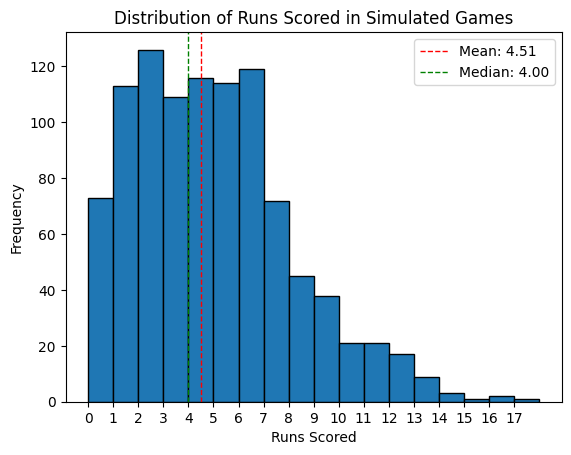

Mean runs: 4.51
Median runs: 4.00


In [25]:
# Calculate the mean and median
mean_runs = np.mean(run_distribution)
median_runs = np.median(run_distribution)

# Plot the distribution of runs
plt.hist(run_distribution, bins=range(max(run_distribution) + 2), edgecolor='black')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.title('Distribution of Runs Scored in Simulated Games')
plt.xticks(range(max(run_distribution) + 1))  # Ensure x-ticks are integers

# Add mean and median lines
plt.axvline(mean_runs, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_runs:.2f}')
plt.axvline(median_runs, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_runs:.2f}')
plt.legend()

plt.show()

print(f"Mean runs: {mean_runs:.2f}")
print(f"Median runs: {median_runs:.2f}")

In [29]:
white_sox['Player'].unique()

array(['Andrew Vaughn', 'Brooks Baldwin', 'Chase Meidroth', 'Edgar Quero',
       'Josh Rojas', 'Joshua Palacios', 'Lenyn Sosa', 'Luis Robert Jr.',
       'Matt Thaiss', 'Michael A. Taylor', 'Miguel Vargas', 'Tim Elko'],
      dtype=object)

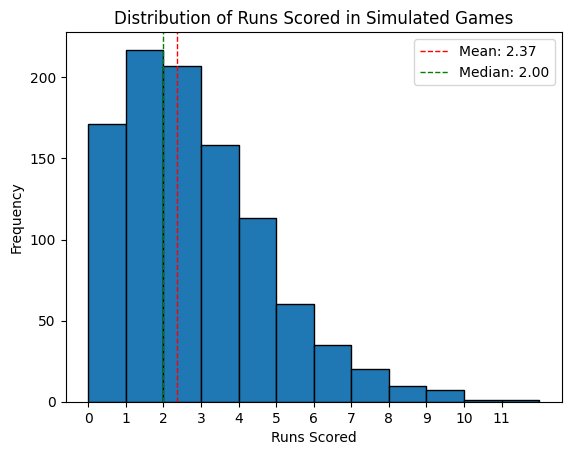

Mean runs: 2.37
Median runs: 2.00


In [35]:
white_sox_lineup = ['Chase Meidroth', 
                    'Matt Thaiss',
                    'Luis Robert Jr.', 
                    'Miguel Vargas', 
                    'Joshua Palacios',
                    'Andrew Vaughn', 
                    'Edgar Quero',
                    'Josh Rojas',
                    'Brooks Baldwin']


# Add derived columns
white_sox['1B'] = white_sox['H'] - white_sox['2B'] - white_sox['3B'] - white_sox['HR']
for stat in ['SO', 'BB', 'HBP', '1B', '2B', '3B', 'HR', 'SF', 'SH', 'GIDP']:
    white_sox[f'{stat}%'] = white_sox[stat] / white_sox['PA']
white_sox['Field Out%'] = 1 - (
    white_sox['SO%'] + white_sox['BB%'] + white_sox['HBP%'] + white_sox['1B%'] +
    white_sox['2B%'] + white_sox['3B%'] + white_sox['HR%'] +
    white_sox['SF%'] + white_sox['SH%'] + white_sox['GIDP%']
)
run_distribution_white_sox = monte_carlo_distribution(white_sox, white_sox_lineup, sims=1000) # Increased simulations for better distribution

# Calculate the mean and median
mean_runs = np.mean(run_distribution_white_sox)
median_runs = np.median(run_distribution_white_sox)

# Plot the distribution of runs
plt.hist(run_distribution_white_sox, bins=range(max(run_distribution_white_sox) + 2), edgecolor='black')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.title('Distribution of Runs Scored in Simulated Games')
plt.xticks(range(max(run_distribution_white_sox) + 1))  # Ensure x-ticks are integers

# Add mean and median lines
plt.axvline(mean_runs, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_runs:.2f}')
plt.axvline(median_runs, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_runs:.2f}')
plt.legend()

plt.show()

print(f"Mean runs: {mean_runs:.2f}")
print(f"Median runs: {median_runs:.2f}")
